# Importing Libs

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv('final_train.csv').drop('Unnamed: 0',axis=1)

mask = df['BizIsExpired?']=='0.0'
df.loc[mask,'BizIsExpired?']=0
df.loc[~mask,'BizIsExpired?']=1

mask = df['BizActive?']=='1.0'
df.loc[mask,'BizActive?']=1
df.loc[~mask,'BizActive?']=0

df['BizIsExpired?'] = df['BizIsExpired?'].astype('int64')
df['BizActive?'] = df['BizActive?'].astype('int64')
df['BizActive?'] = df['BizActive?'].astype('object')

BizDomains = df['BizDomainId']
del df['BizDomainId']
del df['#Deals_file']

X = df[[x for x in df.columns if x!='BizIsExpired?']]
y = df['BizIsExpired?']

X.head()

,no_warning_sign,BizActive?,AddedUsers/BoughtUser,ActiveUsers/AddedUsers,#Activities,ActivitiesWoutDeal/#Activities,AvgDelayTimeActivity,#Activities/#Deals,%NoAcquitance,TransformationSpeed,TransformationRate,%NoReasonFailure,#OngoingDeals/#Total(Correct)Deals
0,0.000000,0,0.642724,0.181397,Low,0.866667,High,1.068966,0.310345,OK,OK,Perfect,0.500000
1,0.238875,1,0.398507,0.274307,High,0.662252,Medium,0.688889,0.917526,OK,OK,Bad,0.627451
2,0.822599,0,1.000000,0.949580,Low,0.000000,High,1.444444,0.000000,Bad,Good,Bad,0.846154
3,0.000000,0,1.000000,0.211382,Low,1.000000,Medium,0.000000,0.602430,NaN,NaN,NaN,0.506440
4,0.082940,1,1.000000,0.804726,VeryHigh,0.773725,Low,3.579350,0.182724,OK,Bad,Medium,0.013858


### successful Customers

In [3]:
successful  = pd.read_csv(r"SuccesfulCustomers.csv")
successful = successful['BizDomainId'].str.lower()
successful[:5]

0    a716842b-c48c-47b4-9ed3-f5444182961f
1    821f17a4-c616-4bc4-8a2a-49552d5c4f06
2    0241caa4-9b3f-4927-a29e-dfebf69c256b
3    bcb4df7a-9a80-46d7-a2a0-f88cd804ea15
4    f18e645a-a17d-4bf5-8bbf-6907079af25c
Name: BizDomainId, dtype: object

# Changing Categorical Data into Nominal

In [4]:
X['#Activities'] = np.where(X['#Activities']=='Low' , 1 
                            ,np.where(X['#Activities']=='VeryHigh' , 4
                                      ,np.where(X['#Activities']=='High',3,
                                                np.where(X['#Activities']=='Medium' , 2 ,X['#Activities'] ))) )
X.loc[:,'AvgDelayTimeActivity'] = np.where(
                            X.loc[:,'AvgDelayTimeActivity']=='Low' , 2,np.where(
                            X.loc[:,'AvgDelayTimeActivity']=='Medium',3,np.where(
                            X.loc[:,'AvgDelayTimeActivity']=='High',4,np.where(
                            X.loc[:,'AvgDelayTimeActivity']=='VeryHigh',5,np.where(
                            X.loc[:,'AvgDelayTimeActivity']=='Perfect',1,X.loc[:,'AvgDelayTimeActivity'])))))
X['AvgDelayTimeActivity'] = X['AvgDelayTimeActivity'].fillna(3)

X.loc[:,'TransformationRate'] = np.where(
                            X.loc[:,'TransformationRate']=='Bad' , 1,np.where(
                            X.loc[:,'TransformationRate']=='OK',2,np.where(
                            X.loc[:,'TransformationRate']=='Good',3,X.loc[:,'TransformationRate'])))
X['TransformationRate'] = X['TransformationRate'].fillna(2)

X.loc[:,'TransformationSpeed'] = np.where(
                            X.loc[:,'TransformationSpeed']=='Bad' , 1,np.where(
                            X.loc[:,'TransformationSpeed']=='OK',2,np.where(
                            X.loc[:,'TransformationSpeed']=='Good',3,X.loc[:,'TransformationSpeed'])))
X['TransformationSpeed'] = X['TransformationSpeed'].fillna(2)

X.loc[:,'%NoReasonFailure'] = np.where(
                            X.loc[:,'%NoReasonFailure']=='Bad' , 1,np.where(
                            X.loc[:,'%NoReasonFailure']=='Medium',2,np.where(
                            X.loc[:,'%NoReasonFailure']=='Perfect',3,X.loc[:,'%NoReasonFailure'])))
X['%NoReasonFailure'] = X['%NoReasonFailure'].fillna(2)

X.head()

,no_warning_sign,BizActive?,AddedUsers/BoughtUser,ActiveUsers/AddedUsers,#Activities,ActivitiesWoutDeal/#Activities,AvgDelayTimeActivity,#Activities/#Deals,%NoAcquitance,TransformationSpeed,TransformationRate,%NoReasonFailure,#OngoingDeals/#Total(Correct)Deals
0,0.000000,0,0.642724,0.181397,1,0.866667,4,1.068966,0.310345,2,2,3,0.500000
1,0.238875,1,0.398507,0.274307,3,0.662252,3,0.688889,0.917526,2,2,1,0.627451
2,0.822599,0,1.000000,0.949580,1,0.000000,4,1.444444,0.000000,1,3,1,0.846154
3,0.000000,0,1.000000,0.211382,1,1.000000,3,0.000000,0.602430,2,2,2,0.506440
4,0.082940,1,1.000000,0.804726,4,0.773725,2,3.579350,0.182724,2,1,2,0.013858


In [5]:
X.shape

(1900, 13)

In [6]:
print('number of expired:',sum(y))

number of expired: 295


## forming good/bad split

In [7]:
X_test_good = BizDomains.isin(successful)

X_test_bad = y==1

# Clustering
In this section 2 clustering methods were applied, and finally K-Medoids was selected

## Kmeans

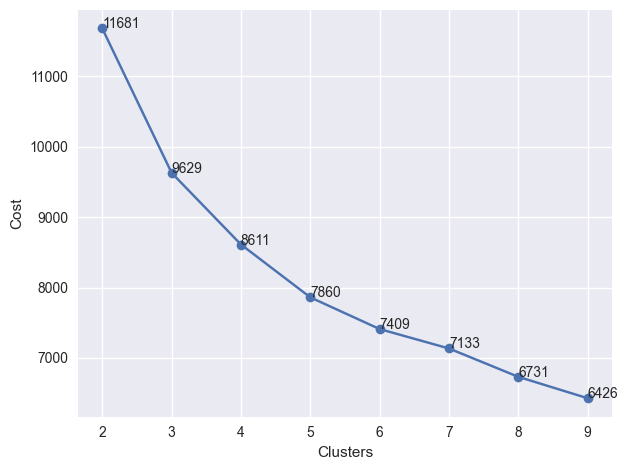

In [8]:
from sklearn.cluster import KMeans
lis = []
for i in range(2,10):
    km = KMeans(n_clusters=i)
    km.fit(X)
    J = np.abs(km.score(X))
    lis.append(J)
#     plt.plot( i ,np.abs(J) , label=i)


plt.figure()
plt.style.use('seaborn')
plt.plot(np.arange(2,10) , lis , marker='o')
for index in range(2,10):
    plt.text(index, lis[index-2], int(lis[index-2]), size=10)
plt.xlabel('Clusters')
plt.ylabel('Cost')
plt.tight_layout()
# plt.savefig('cost Kmeans')
plt.show()

In [9]:
for i in range(2,6):
    km = KMeans(n_clusters=i)
    km.fit(X)
    preds = km.predict(X)
    
    unique, counts = np.unique(preds, return_counts=True)
    print(f'for clusters = {i}')
    print(dict(zip(unique, counts)))

    unique, counts = np.unique(preds[X_test_good], return_counts=True)
    print(dict(zip(unique, counts)))


    unique, counts = np.unique(preds[X_test_bad], return_counts=True)
    print(dict(zip(unique, counts)))
    print('--------------\n')

for clusters = 2
{0: 1459, 1: 441}
{0: 15, 1: 11}
{0: 271, 1: 24}
--------------

for clusters = 3
{0: 936, 1: 607, 2: 357}
{0: 1, 1: 18, 2: 7}
{0: 229, 1: 46, 2: 20}
--------------

for clusters = 4
{0: 345, 1: 347, 2: 638, 3: 570}
{0: 1, 1: 7, 3: 18}
{0: 93, 1: 20, 2: 145, 3: 37}
--------------

for clusters = 5
{0: 408, 1: 265, 2: 332, 3: 615, 4: 280}
{0: 11, 1: 6, 4: 9}
{0: 43, 1: 15, 2: 87, 3: 133, 4: 17}
--------------



## KMedoids

In [10]:
# !pip install gower

In [11]:
X['BizActive?'] = X['BizActive?'].astype('int64')
X['#Activities'] = X['#Activities'].astype('int64')
# X.info()

In [12]:
import gower
dist_matrix = gower.gower_matrix(X)

In [13]:
# !pip install scikit-learn-extra

In [14]:
from sklearn_extra.cluster import KMedoids

cost=[]
for i in range(2,10):
    kmedoid = KMedoids(n_clusters=i, 
                               metric='precomputed',
                               method='pam', init='build', 
                               max_iter=500, 
                               random_state=1).fit(dist_matrix)
    lables = kmedoid.labels_
    unique, counts = np.unique(np.array(lables), return_counts=True)
    print(f'for clusters = {i}')
    print(dict(zip(unique, counts)))

    unique, counts = np.unique(lables[X_test_good], return_counts=True)
    print(dict(zip(unique, counts)))


    unique, counts = np.unique(lables[X_test_bad], return_counts=True)
    print(dict(zip(unique, counts)))
    print('--------------\n')
    cost.append(kmedoid.inertia_)

for clusters = 2
{0: 1195, 1: 705}
{0: 26}
{0: 23, 1: 272}
--------------

for clusters = 3
{0: 423, 1: 422, 2: 1055}
{0: 1, 2: 25}
{0: 23, 1: 246, 2: 26}
--------------

for clusters = 4
{0: 463, 1: 392, 2: 661, 3: 384}
{0: 18, 2: 7, 3: 1}
{0: 13, 1: 237, 2: 22, 3: 23}
--------------

for clusters = 5
{0: 274, 1: 248, 2: 627, 3: 389, 4: 362}
{2: 10, 3: 1, 4: 15}
{0: 104, 1: 162, 2: 5, 3: 21, 4: 3}
--------------

for clusters = 6
{0: 181, 1: 223, 2: 529, 3: 329, 4: 376, 5: 262}
{0: 3, 2: 5, 3: 1, 4: 17}
{0: 1, 1: 160, 2: 4, 3: 20, 4: 2, 5: 108}
--------------

for clusters = 7
{0: 238, 1: 219, 2: 419, 3: 317, 4: 297, 5: 237, 6: 173}
{2: 7, 3: 1, 4: 15, 6: 3}
{1: 160, 2: 3, 3: 20, 4: 3, 5: 108, 6: 1}
--------------

for clusters = 8
{0: 185, 1: 211, 2: 363, 3: 239, 4: 298, 5: 228, 6: 167, 7: 209}
{0: 1, 2: 6, 3: 1, 4: 15, 6: 3}
{0: 3, 1: 158, 2: 5, 3: 20, 4: 3, 5: 105, 6: 1}
--------------

for clusters = 9
{0: 286, 1: 210, 2: 200, 3: 223, 4: 256, 5: 203, 6: 165, 7: 197, 8: 160}
{0: 4,

In [15]:
df_cost = pd.DataFrame({'Cluster':range(2, 10), 'Cost':cost})
df_cost

,Cluster,Cost
0,2,409.112122
1,3,368.956177
2,4,346.338745
3,5,327.728271
4,6,312.600739
5,7,301.921173
6,8,292.653778
7,9,284.294495


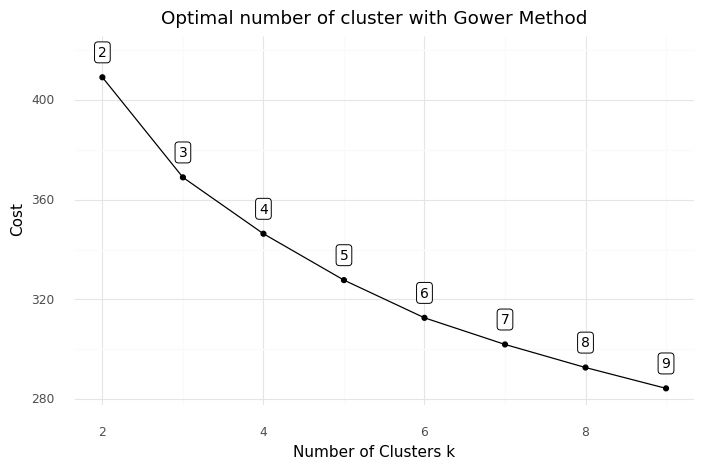

<ggplot: (134682228249)>

In [16]:
from plotnine import *
import plotnine
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 10) +
    labs(title = 'Optimal number of cluster with Gower Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

# Best Clustering Methods
Labels are selected in a way that if a cluster is made up of more proportion of positive labels, then its members are positive, otherwise it is negative.

## KMedoids (k=2)

In [17]:
import gower
dist_matrix = gower.gower_matrix(X)
from sklearn_extra.cluster import KMedoids

cluster = 2
labels = KMedoids(n_clusters=cluster, 
                           metric='precomputed',
                           method='pam', init='build', 
                           max_iter=500, 
                           random_state=1).fit_predict(dist_matrix)

In [18]:
df_decision_medoid = pd.DataFrame()
df_decision_medoid['cluster'] = np.arange(cluster)
value, counts = np.unique(labels[X_test_good], return_counts=True)
dic = dict(zip(value , counts))
counts=[dic[i] if (i in value) else 0 for i in range(cluster)]

df_decision_medoid['pos']=counts
value, counts = np.unique(labels[X_test_bad], return_counts=True)
df_decision_medoid['neg']=counts
df_decision_medoid['prop_pos'] = df_decision_medoid['pos']/df_decision_medoid['pos'].sum()
df_decision_medoid['prop_neg'] = df_decision_medoid['neg']/df_decision_medoid['neg'].sum()

In [19]:
value, counts = np.unique(labels, return_counts=True)
df_decision_medoid['total'] = counts
df_decision_medoid

,cluster,pos,neg,prop_pos,prop_neg,total
0,0,26,23,1.0,0.077966,1195
1,1,0,272,0.0,0.922034,705


In [20]:
label_pos = df_decision_medoid.loc[df_decision_medoid['prop_pos']>df_decision_medoid['prop_neg'],
                                 'cluster'].tolist()
label_neg = df_decision_medoid.loc[df_decision_medoid['prop_pos']<df_decision_medoid['prop_neg'],
                                 'cluster'].tolist()

In [21]:
X['BizIsExpired?'] = labels

#positive labels equal to 0 and negative ones equal to 1
X['BizIsExpired?'] = np.where(X['BizIsExpired?'].isin(label_pos) , 0 , 1)

#default expires
X.loc[df['BizIsExpired?'] ==1 , 'BizIsExpired?']=1

In [22]:
X.head()

,no_warning_sign,BizActive?,AddedUsers/BoughtUser,ActiveUsers/AddedUsers,#Activities,ActivitiesWoutDeal/#Activities,AvgDelayTimeActivity,#Activities/#Deals,%NoAcquitance,TransformationSpeed,TransformationRate,%NoReasonFailure,#OngoingDeals/#Total(Correct)Deals,BizIsExpired?
0,0.000000,0,0.642724,0.181397,1,0.866667,4,1.068966,0.310345,2,2,3,0.500000,1
1,0.238875,1,0.398507,0.274307,3,0.662252,3,0.688889,0.917526,2,2,1,0.627451,0
2,0.822599,0,1.000000,0.949580,1,0.000000,4,1.444444,0.000000,1,3,1,0.846154,0
3,0.000000,0,1.000000,0.211382,1,1.000000,3,0.000000,0.602430,2,2,2,0.506440,1
4,0.082940,1,1.000000,0.804726,4,0.773725,2,3.579350,0.182724,2,1,2,0.013858,0


In [23]:
X.to_csv('K-Medoids_k=2_Numerical.csv')

## KMedoids (k=3)

In [24]:
import gower
dist_matrix = gower.gower_matrix(X)
from sklearn_extra.cluster import KMedoids

cluster = 3
labels = KMedoids(n_clusters=cluster, 
                           metric='precomputed',
                           method='pam', init='build', 
                           max_iter=500, 
                           random_state=1).fit_predict(dist_matrix)

In [25]:
df_decision_medoid = pd.DataFrame()
df_decision_medoid['cluster'] = np.arange(cluster)
value, counts = np.unique(labels[X_test_good], return_counts=True)
dic = dict(zip(value , counts))
counts=[dic[i] if (i in value) else 0 for i in range(cluster)]

df_decision_medoid['pos']=counts
value, counts = np.unique(labels[X_test_bad], return_counts=True)
df_decision_medoid['neg']=counts
df_decision_medoid['prop_pos'] = df_decision_medoid['pos']/df_decision_medoid['pos'].sum()
df_decision_medoid['prop_neg'] = df_decision_medoid['neg']/df_decision_medoid['neg'].sum()

In [26]:
value, counts = np.unique(labels, return_counts=True)
df_decision_medoid['total'] = counts
df_decision_medoid

,cluster,pos,neg,prop_pos,prop_neg,total
0,0,0,23,0.0,0.077966,332
1,1,0,261,0.0,0.884746,448
2,2,26,11,1.0,0.037288,1120


In [27]:
label_pos = df_decision_medoid.loc[df_decision_medoid['prop_pos']>df_decision_medoid['prop_neg'],
                                 'cluster'].tolist()
label_neg = df_decision_medoid.loc[df_decision_medoid['prop_pos']<df_decision_medoid['prop_neg'],
                                 'cluster'].tolist()

In [28]:
X['BizIsExpired?'] = labels

#positive labels equal to 0 and negative ones equal to 1
X['BizIsExpired?'] = np.where(X['BizIsExpired?'].isin(label_pos) , 0 , 1)

#default expires
X.loc[df['BizIsExpired?'] ==1 , 'BizIsExpired?']=1

In [29]:
X.head()

,no_warning_sign,BizActive?,AddedUsers/BoughtUser,ActiveUsers/AddedUsers,#Activities,ActivitiesWoutDeal/#Activities,AvgDelayTimeActivity,#Activities/#Deals,%NoAcquitance,TransformationSpeed,TransformationRate,%NoReasonFailure,#OngoingDeals/#Total(Correct)Deals,BizIsExpired?
0,0.000000,0,0.642724,0.181397,1,0.866667,4,1.068966,0.310345,2,2,3,0.500000,1
1,0.238875,1,0.398507,0.274307,3,0.662252,3,0.688889,0.917526,2,2,1,0.627451,0
2,0.822599,0,1.000000,0.949580,1,0.000000,4,1.444444,0.000000,1,3,1,0.846154,0
3,0.000000,0,1.000000,0.211382,1,1.000000,3,0.000000,0.602430,2,2,2,0.506440,1
4,0.082940,1,1.000000,0.804726,4,0.773725,2,3.579350,0.182724,2,1,2,0.013858,0


In [30]:
X.to_csv('K-Medoids_k=3_Numerical.csv')

## KMedoids (k=4)

In [31]:
import gower
dist_matrix = gower.gower_matrix(X)
from sklearn_extra.cluster import KMedoids

cluster = 4
labels = KMedoids(n_clusters=cluster, 
                           metric='precomputed',
                           method='pam', init='build', 
                           max_iter=500, 
                           random_state=1).fit_predict(dist_matrix)

In [32]:
df_decision_medoid = pd.DataFrame()
df_decision_medoid['cluster'] = np.arange(cluster)
value, counts = np.unique(labels[X_test_good], return_counts=True)
dic = dict(zip(value , counts))
counts=[dic[i] if (i in value) else 0 for i in range(cluster)]

df_decision_medoid['pos']=counts
value, counts = np.unique(labels[X_test_bad], return_counts=True)
df_decision_medoid['neg']=counts
df_decision_medoid['prop_pos'] = df_decision_medoid['pos']/df_decision_medoid['pos'].sum()
df_decision_medoid['prop_neg'] = df_decision_medoid['neg']/df_decision_medoid['neg'].sum()

In [33]:
value, counts = np.unique(labels, return_counts=True)
df_decision_medoid['total'] = counts
df_decision_medoid

,cluster,pos,neg,prop_pos,prop_neg,total
0,0,18,8,0.692308,0.027119,464
1,1,0,259,0.000000,0.877966,443
2,2,8,5,0.307692,0.016949,660
3,3,0,23,0.000000,0.077966,333


In [34]:
label_pos = df_decision_medoid.loc[df_decision_medoid['prop_pos']>df_decision_medoid['prop_neg'],
                                 'cluster'].tolist()
label_neg = df_decision_medoid.loc[df_decision_medoid['prop_pos']<df_decision_medoid['prop_neg'],
                                 'cluster'].tolist()

In [35]:
X['BizIsExpired?'] = labels

#positive labels equal to 0 and negative ones equal to 1
X['BizIsExpired?'] = np.where(X['BizIsExpired?'].isin(label_pos) , 0 , 1)

#default expires
X.loc[df['BizIsExpired?'] ==1 , 'BizIsExpired?']=1

In [36]:
X.head()

,no_warning_sign,BizActive?,AddedUsers/BoughtUser,ActiveUsers/AddedUsers,#Activities,ActivitiesWoutDeal/#Activities,AvgDelayTimeActivity,#Activities/#Deals,%NoAcquitance,TransformationSpeed,TransformationRate,%NoReasonFailure,#OngoingDeals/#Total(Correct)Deals,BizIsExpired?
0,0.000000,0,0.642724,0.181397,1,0.866667,4,1.068966,0.310345,2,2,3,0.500000,1
1,0.238875,1,0.398507,0.274307,3,0.662252,3,0.688889,0.917526,2,2,1,0.627451,0
2,0.822599,0,1.000000,0.949580,1,0.000000,4,1.444444,0.000000,1,3,1,0.846154,0
3,0.000000,0,1.000000,0.211382,1,1.000000,3,0.000000,0.602430,2,2,2,0.506440,1
4,0.082940,1,1.000000,0.804726,4,0.773725,2,3.579350,0.182724,2,1,2,0.013858,0


In [37]:
X.to_csv('K-Medoids_k=4_Numerical.csv')

## KMedoids (k=5)

In [38]:
import gower
dist_matrix = gower.gower_matrix(X)
from sklearn_extra.cluster import KMedoids

cluster = 5
labels = KMedoids(n_clusters=cluster, 
                           metric='precomputed',
                           method='pam', init='build', 
                           max_iter=500, 
                           random_state=1).fit_predict(dist_matrix)

In [39]:
df_decision_medoid

,cluster,pos,neg,prop_pos,prop_neg,total
0,0,18,8,0.692308,0.027119,464
1,1,0,259,0.000000,0.877966,443
2,2,8,5,0.307692,0.016949,660
3,3,0,23,0.000000,0.077966,333


In [40]:
df_decision_medoid

,cluster,pos,neg,prop_pos,prop_neg,total
0,0,18,8,0.692308,0.027119,464
1,1,0,259,0.000000,0.877966,443
2,2,8,5,0.307692,0.016949,660
3,3,0,23,0.000000,0.077966,333


In [41]:
df_decision_medoid = pd.DataFrame()
df_decision_medoid['cluster'] = np.arange(cluster)
value, counts = np.unique(labels[X_test_good], return_counts=True)
dic = dict(zip(value , counts))
counts=[dic[i] if (i in value) else 0 for i in range(cluster)]

df_decision_medoid['pos']=counts
value, counts = np.unique(labels[X_test_bad], return_counts=True)
dic = dict(zip(value , counts))
counts=[dic[i] if (i in value) else 0 for i in range(cluster)]
df_decision_medoid['neg']=counts
df_decision_medoid['prop_pos'] = df_decision_medoid['pos']/df_decision_medoid['pos'].sum()
df_decision_medoid['prop_neg'] = df_decision_medoid['neg']/df_decision_medoid['neg'].sum()

In [42]:
value, counts = np.unique(labels, return_counts=True)
df_decision_medoid['total'] = counts
df_decision_medoid

,cluster,pos,neg,prop_pos,prop_neg,total
0,0,0,108,0.000000,0.366102,233
1,1,0,164,0.000000,0.555932,243
2,2,8,0,0.307692,0.000000,654
3,3,0,21,0.000000,0.071186,312
4,4,18,2,0.692308,0.006780,458


In [43]:
label_pos = df_decision_medoid.loc[df_decision_medoid['prop_pos']>df_decision_medoid['prop_neg'],
                                 'cluster'].tolist()
label_neg = df_decision_medoid.loc[df_decision_medoid['prop_pos']<df_decision_medoid['prop_neg'],
                                 'cluster'].tolist()

In [44]:
X['BizIsExpired?'] = labels

#positive labels equal to 0 and negative ones equal to 1
X['BizIsExpired?'] = np.where(X['BizIsExpired?'].isin(label_pos) , 0 , 1)

#default expires
X.loc[df['BizIsExpired?'] ==1 , 'BizIsExpired?']=1

In [45]:
X.head()

,no_warning_sign,BizActive?,AddedUsers/BoughtUser,ActiveUsers/AddedUsers,#Activities,ActivitiesWoutDeal/#Activities,AvgDelayTimeActivity,#Activities/#Deals,%NoAcquitance,TransformationSpeed,TransformationRate,%NoReasonFailure,#OngoingDeals/#Total(Correct)Deals,BizIsExpired?
0,0.000000,0,0.642724,0.181397,1,0.866667,4,1.068966,0.310345,2,2,3,0.500000,1
1,0.238875,1,0.398507,0.274307,3,0.662252,3,0.688889,0.917526,2,2,1,0.627451,0
2,0.822599,0,1.000000,0.949580,1,0.000000,4,1.444444,0.000000,1,3,1,0.846154,0
3,0.000000,0,1.000000,0.211382,1,1.000000,3,0.000000,0.602430,2,2,2,0.506440,1
4,0.082940,1,1.000000,0.804726,4,0.773725,2,3.579350,0.182724,2,1,2,0.013858,0


In [46]:
X.to_csv('K-Medoids_k=5_Numerical.csv')